In [1]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.4 MB/s eta 0:00:00


**NLP**

In [4]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

res = classifier("Mark antony movie was not good")
print(res)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'NEGATIVE', 'score': 0.9997296929359436}]


**Image to text**

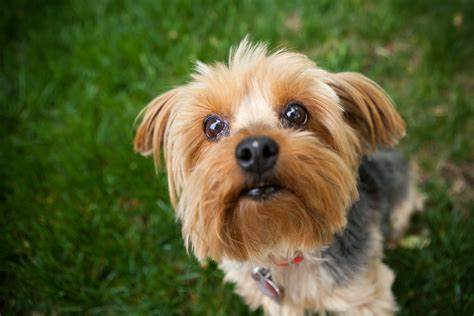

In [5]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import requests

url = 'https://th.bing.com/th/id/OIP.U4a05VxpJ-AJkyZrBKcutgHaE8?pid=ImgDet&rs=1'
image = Image.open(requests.get(url, stream=True).raw)

image

In [6]:
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: Yorkshire terrier


**Text to Image**

In [7]:
import requests

API_URL = "https://api-inference.huggingface.co/models/runwayml/stable-diffusion-v1-5"
headers = {"Authorization": "Bearer #############"}

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.content
image_bytes = query({
	"inputs": "Cricket player walking with bat",
})
# You can access the image with PIL.Image for example
import io
from PIL import Image
image = Image.open(io.BytesIO(image_bytes))

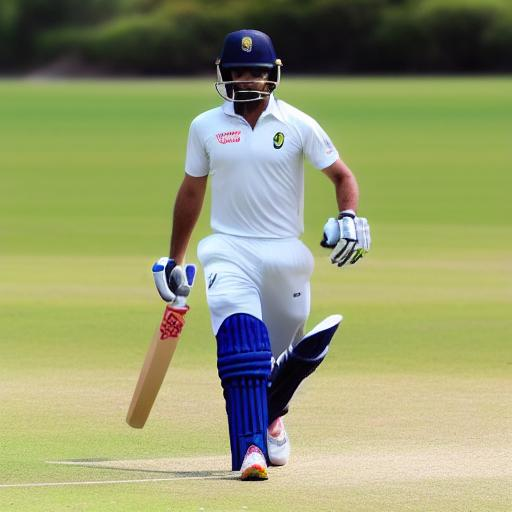

In [8]:
image

In [9]:
pip install diffusers transformers accelerate torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 8.6 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.21.1-py3-none-any.whl size=1486516 sha256=d00943b577a7885c97bcd70c741f65885a9ef036c4ad011f109f910ec9bdc19c
  Stored in directory: /root/.cache/pip/wheels/a8/52/ec/901d7f3e1128bc56ea4365e9d3a157c1088e5450f4e8f7b202
Successfully built diffusers


In [2]:
pip install diffusers transformers accelerate torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.6 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.21.1-py3-none-any.whl size=1486516 sha256=96a62fae168050fe7c2d388c8118a101b83d5687ac8075c561b13d9d5e734011
  Stored in directory: /root/.cache/pip/wheels/a8/52/ec/901d7f3e1128bc56ea4365e9d3a157c1088e5450f4e8f7b202
Successfully built diffusers


**Text to small video**

In [2]:
import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
from diffusers.utils import export_to_video

pipe = DiffusionPipeline.from_pretrained("damo-vilab/text-to-video-ms-1.7b", torch_dtype=torch.float16, variant="fp16")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

prompt = "Spiderman is surfing"
video_frames = pipe(prompt, num_inference_steps=25).frames
video_path = export_to_video(video_frames)


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

In [6]:
import os
import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
from diffusers.utils import export_to_video

# Initialize DiffusionPipeline
pipe = DiffusionPipeline.from_pretrained("damo-vilab/text-to-video-ms-1.7b", torch_dtype=torch.float16, variant="fp16")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

# Set the prompt and generate video frames
prompt = "Cricket player is batting"
num_inference_steps = 25
video_frames = pipe(prompt, num_inference_steps=num_inference_steps).frames

# Specify the desired file path and name within the Colab environment
colab_video_path = "/content/cricketer_batting.mp4"

# Export video frames
video_path = export_to_video(video_frames)

# Move the exported video to the desired Colab path
os.rename(video_path, colab_video_path)

# Print the path where the video was saved
print(f"Video exported to: {colab_video_path}")


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Video exported to: /content/cricketer_batting.mp4


In [9]:
import os
import torch
import base64
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
from diffusers.utils import export_to_video
from IPython.display import HTML

# Initialize DiffusionPipeline
pipe = DiffusionPipeline.from_pretrained("damo-vilab/text-to-video-ms-1.7b", torch_dtype=torch.float16, variant="fp16")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

# Set the prompt and generate video frames
prompt = "Spiderman is surfing"
num_inference_steps = 25
video_frames = pipe(prompt, num_inference_steps=num_inference_steps).frames

# Specify the desired file path and name within the Colab environment
colab_video_path = "/content/spiderman_surfing_video.mp4"

# Export video frames
video_path = export_to_video(video_frames)

# Move the exported video to the desired Colab path
os.rename(video_path, colab_video_path)

# Print the path where the video was saved
print(f"Video exported to: {colab_video_path}")

# Read the video and convert to base64
with open(colab_video_path, "rb") as video_file:
    video_encoded = base64.b64encode(video_file.read()).decode()

# Display the video
HTML(f'<video controls><source type="video/mp4" src="data:video/mp4;base64,{video_encoded}"></video>')

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Video exported to: /content/spiderman_surfing_video.mp4


In [14]:
pip install git+https://github.com/huggingface/diffusers transformers accelerate


  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-ybx5_i62
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-ybx5_i62
  Resolved https://github.com/huggingface/diffusers to commit 38a664a3d61e27ab18cd698231422b3c38d6eebf
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.22.0.dev0-py3-none-any.whl size=1479468 sha256=03045dc9fd269db6c9b44a31f08de4bd3004ab1a65e5278f7a1b02afd8677b6a
  Stored in directory: /tmp/pip-ephem-wheel-cache-ssnnxhug/wheels/f7/7d/99/d361489e5762e3464b3811bc629e94cf5bf5ef44dd5c3c4d52
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.21.1
    Uninstalling diffusers-0.21.1:
      Successfully uninstalled diffusers-0.21.1


**Text to large video**

In [18]:
import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
from diffusers.utils import export_to_video

# load pipeline
pipe = DiffusionPipeline.from_pretrained("damo-vilab/text-to-video-ms-1.7b", torch_dtype=torch.float16, variant="fp16")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

# optimize for GPU memory
pipe.enable_model_cpu_offload()
pipe.enable_vae_slicing()

# generate
prompt = "Wrestler fighting with another wrestler"
video_frames = pipe(prompt, num_inference_steps=25, num_frames=200).frames

colab_video_path = "/content/wrestler_fighting.mp4"

# Export video frames
video_path = export_to_video(video_frames)

# Move the exported video to the desired Colab path
os.rename(video_path, colab_video_path)

# Print the path where the video was saved
print(f"Video exported to: {colab_video_path}")


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Video exported to: /content/wrestler_fighting.mp4


**Image - Question/Answer**

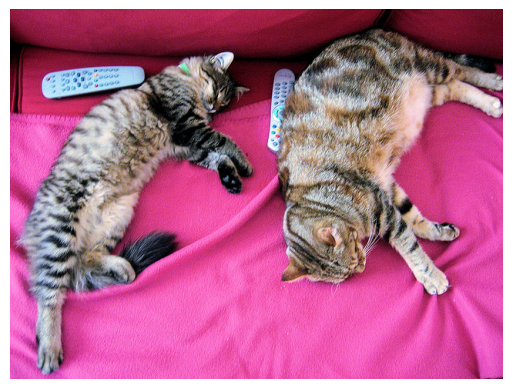

Predicted answer: 2


In [25]:
from transformers import ViltProcessor, ViltForQuestionAnswering
import requests
from PIL import Image

# prepare image + question
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
text = "How many cats are there?"

processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

encoding = processor(image, text, return_tensors="pt")

# forward pass
outputs = model(**encoding)
logits = outputs.logits
idx = logits.argmax(-1).item()
predicted_answer = model.config.id2label[idx]

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

# Print the predicted answer
print("Predicted answer:", predicted_answer)

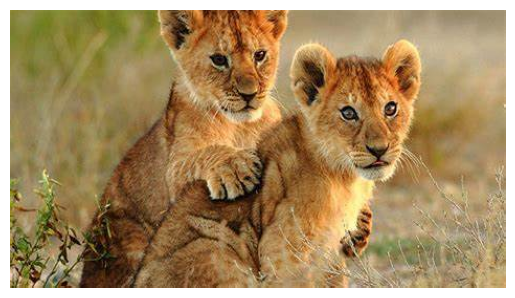

Predicted answer: 2


In [24]:
from transformers import ViltProcessor, ViltForQuestionAnswering
import requests
from PIL import Image
import matplotlib.pyplot as plt

# prepare image + question
url = "https://th.bing.com/th/id/OIP.xHCFU99juWnSZ7UZI_TS9QHaEK?pid=ImgDet&rs=1"
image = Image.open(requests.get(url, stream=True).raw)
text = "How many baby lions are there?"

processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

# prepare inputs
encoding = processor(image, text, return_tensors="pt")

# forward pass
outputs = model(**encoding)
logits = outputs.logits
idx = logits.argmax(-1).item()
predicted_answer = model.config.id2label[idx]

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

# Print the predicted answer
print("Predicted answer:", predicted_answer)


In [4]:
pip install git+https://github.com/huggingface/transformers.git@2ef774211733f0acf8d3415f9284c49ef219e991

  Cloning https://github.com/huggingface/transformers.git (to revision 2ef774211733f0acf8d3415f9284c49ef219e991) to /tmp/pip-req-build-cfi11l2g
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-cfi11l2g
  Running command git rev-parse -q --verify 'sha^2ef774211733f0acf8d3415f9284c49ef219e991'
  Running command git fetch -q https://github.com/huggingface/transformers.git 2ef774211733f0acf8d3415f9284c49ef219e991
  Running command git checkout -q 2ef774211733f0acf8d3415f9284c49ef219e991
  Resolved https://github.com/huggingface/transformers.git to commit 2ef774211733f0acf8d3415f9284c49ef219e991
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


**Image extract - Questions/Answers**

In [3]:
from transformers import pipeline

nlp = pipeline(
    "document-question-answering",
    model="impira/layoutlm-document-qa",
)

nlp(
    "https://templates.invoicehome.com/invoice-template-us-neat-750px.png",
    "What is the invoice number?"
)
# {'score': 0.9943977, 'answer': 'us-001', 'start': 15, 'end': 15}

nlp(
    "https://miro.medium.com/max/787/1*iECQRIiOGTmEFLdWkVIH2g.jpeg",
    "What is the purchase amount?"
)
# {'score': 0.9912159, 'answer': '$1,000,000,000', 'start': 97, 'end': 97}

nlp(
    "https://www.accountingcoach.com/wp-content/uploads/2013/10/income-statement-example@2x.png",
    "What are the 2020 net sales?"
)
# {'score': 0.59147286, 'answer': '$ 3,750', 'start': 19, 'end': 20}


[{'score': 0.9780113101005554, 'answer': '$ 3,980', 'start': 15, 'end': 16}]